In [1]:
import numpy as np
import pandas as pd
import researchpy as rp
import seaborn as sns
from sklearn.linear_model import LogisticRegression as LR
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/cleaned_data_by_clustering_fill.csv', delimiter=",")
df.drop(['Component1', 'Component2', 'Component3', 'Component4', 'k-means cluster'], axis=1, inplace=True)
# df = pd.read_csv('data/cleaned_data.csv', delimiter=",")


In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,31,admin.,single,high.school,no,yes,no,telephone,dec,mon,...,1,999,0,nonexistent,-0.2,92.756,-45.9,3.816,5176.3,no
1,39,housemaid,married,basic.4y,no,yes,no,telephone,dec,wed,...,1,999,1,failure,-0.2,92.756,-45.9,3.743,5176.3,no
2,41,technician,divorced,professional.course,no,no,yes,cellular,dec,thu,...,1,999,0,nonexistent,-0.2,92.756,-45.9,3.669,5176.3,no
3,37,admin.,married,high.school,no,yes,no,telephone,dec,fri,...,1,999,0,nonexistent,-0.2,92.756,-45.9,3.563,5176.3,no
4,48,admin.,married,high.school,no,yes,yes,telephone,dec,fri,...,1,999,0,nonexistent,-0.2,92.756,-45.9,3.563,5176.3,no


In [4]:
job = pd.get_dummies(df['job'], drop_first=True)
job = job.add_prefix("job_")
marital = pd.get_dummies(df['marital'], drop_first=True)
marital = marital.add_prefix("marital_")
education = pd.get_dummies(df['education'], drop_first=True)
education = education.add_prefix("education_")
default = pd.get_dummies(df['default'], drop_first=True)
default = default.add_prefix("default_")
housing = pd.get_dummies(df['housing'], drop_first=True)
housing = housing.add_prefix("housing_")
loan = pd.get_dummies(df['loan'], drop_first=True)
loan = loan.add_prefix("loan_")
contact = pd.get_dummies(df['contact'], drop_first=True)
contact = contact.add_prefix("contact_")
month = pd.get_dummies(df['month'], drop_first=True)
month = month.add_prefix("month_")
day_of_week = pd.get_dummies(df['day_of_week'], drop_first=True)
day_of_week = day_of_week.add_prefix("day_of_week_")
poutcome = pd.get_dummies(df['poutcome'], drop_first=True)
poutcome = poutcome.add_prefix("poutcome_")
y = pd.get_dummies(df['y'], drop_first=True)
y = y.add_prefix("y_")

df.drop(['duration', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], axis=1, inplace=True)
df = pd.concat([df, job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, y], axis=1)



In [5]:
df.head()

,age,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,31,1,999,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,39,1,999,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,41,1,999,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,37,1,999,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,48,1,999,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            41188 non-null  int64
 1   campaign                       41188 non-null  int64
 2   pdays                          41188 non-null  int64
 3   previous                       41188 non-null  int64
 4   job_blue-collar                41188 non-null  uint8
 5   job_entrepreneur               41188 non-null  uint8
 6   job_housemaid                  41188 non-null  uint8
 7   job_management                 41188 non-null  uint8
 8   job_retired                    41188 non-null  uint8
 9   job_self-employed              41188 non-null  uint8
 10  job_services                   41188 non-null  uint8
 11  job_student                    41188 non-null  uint8
 12  job_technician                 41188 non-null  uint8
 13  job_unemployed  

In [10]:
X = df.drop("y_yes", axis=1)
y = df['y_yes']
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
X = sm.add_constant(X)
est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  y_yes   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     200.7
Date:                Sat, 10 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:07:27   Log-Likelihood:                -7262.4
No. Observations:               41188   AIC:                         1.461e+04
Df Residuals:                   41146   BIC:                         1.497e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1127      0.001     79.172      0.0

In [9]:
clf = LR(random_state=0).fit(X, y)

/Users/Lin/opt/anaconda3/envs/2022datathon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, preds)
roc_auc = metrics.auc(fpr, tpr)

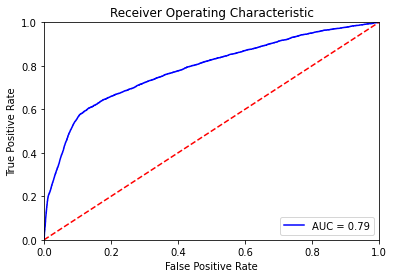

In [11]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [12]:
from sklearn.metrics import accuracy_score
preds = clf.predict(X)
accuracy_score(y, preds)

0.8988054773234923

In [13]:
df = pd.read_csv('data/cleaned_data.csv', delimiter=",")
job = pd.get_dummies(df['job'], drop_first=True)
job = job.add_prefix("job_")
marital = pd.get_dummies(df['marital'], drop_first=True)
marital = marital.add_prefix("marital_")
education = pd.get_dummies(df['education'], drop_first=True)
education = education.add_prefix("education_")
default = pd.get_dummies(df['default'], drop_first=True)
default = default.add_prefix("default_")
housing = pd.get_dummies(df['housing'], drop_first=True)
housing = housing.add_prefix("housing_")
loan = pd.get_dummies(df['loan'], drop_first=True)
loan = loan.add_prefix("loan_")
contact = pd.get_dummies(df['contact'], drop_first=True)
contact = contact.add_prefix("contact_")
month = pd.get_dummies(df['month'], drop_first=True)
month = month.add_prefix("month_")
day_of_week = pd.get_dummies(df['day_of_week'], drop_first=True)
day_of_week = day_of_week.add_prefix("day_of_week_")
poutcome = pd.get_dummies(df['poutcome'], drop_first=True)
poutcome = poutcome.add_prefix("poutcome_")
y = pd.get_dummies(df['y'], drop_first=True)
y = y.add_prefix("y_")

df.drop(['duration', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y'], axis=1, inplace=True)
df = pd.concat([df, job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, y], axis=1)

X = df.drop("y_yes", axis=1)
y = df['y_yes']

In [14]:
X = sm.add_constant(X)
est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  y_yes   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     243.8
Date:                Thu, 08 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:10:40   Log-Likelihood:                -6051.1
No. Observations:               41188   AIC:                         1.220e+04
Df Residuals:                   41141   BIC:                         1.260e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [15]:
clf = LR(random_state=0).fit(X, y)

/Users/Lin/opt/anaconda3/envs/2022datathon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


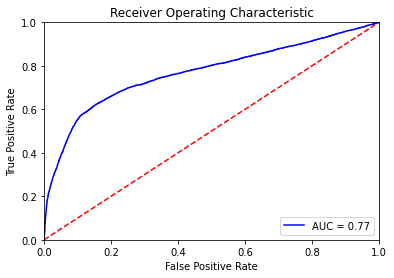

In [16]:
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [17]:
preds = clf.predict(X)
accuracy_score(y, preds)

0.8994852869767893